In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets
raw_boston = datasets.load_boston()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_boston.data
y = raw_boston.target

In [4]:
# 피쳐 데이터 차원 확인
print(X.shape)

(506, 13)


In [5]:
# 타겟 데이터 종류 확인
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [6]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y, random_state=0)

In [7]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))

In [8]:
# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])

In [9]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
76/76 [==============================] - 1s 1ms/step - loss: 1097.3818 - mean_squared_error: 1097.3818
Epoch 2/30
76/76 [==============================] - 0s 1ms/step - loss: 103.8141 - mean_squared_error: 103.8141
Epoch 3/30
76/76 [==============================] - 0s 1ms/step - loss: 77.5593 - mean_squared_error: 77.5593
Epoch 4/30
76/76 [==============================] - 0s 1ms/step - loss: 68.6218 - mean_squared_error: 68.6218
Epoch 5/30
76/76 [==============================] - 0s 1ms/step - loss: 55.6526 - mean_squared_error: 55.6526
Epoch 6/30
76/76 [==============================] - 0s 1ms/step - loss: 55.9980 - mean_squared_error: 55.9980
Epoch 7/30
76/76 [==============================] - 0s 1ms/step - loss: 56.1334 - mean_squared_error: 56.1334
Epoch 8/30
76/76 [==============================] - 0s 1ms/step - loss: 51.2321 - mean_squared_error: 51.2321
Epoch 9/30
76/76 [==============================] - 0s 1ms/step - loss: 54.8327 - mean_squared_error: 54.8327
Epoc

In [10]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

12/12 [==============================] - 0s 1ms/step - loss: 51.5559 - mean_squared_error: 51.5559
51.55585861206055


In [11]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

4/4 [==============================] - 0s 2ms/step - loss: 73.9727 - mean_squared_error: 73.9727
73.97270965576172


In [12]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [13]:
mse = hist.history['mean_squared_error'] 
print(mse)

[474.8179931640625, 97.47370910644531, 81.16605377197266, 72.60588836669922, 63.10710144042969, 57.30556869506836, 53.324825286865234, 48.03045654296875, 44.41232681274414, 44.62459182739258, 39.88541030883789, 37.467735290527344, 37.210079193115234, 34.657989501953125, 35.22400665283203, 37.2569580078125, 36.620094299316406, 35.4106330871582, 33.90781021118164, 34.473819732666016, 36.57754135131836, 35.87944793701172, 34.442447662353516, 35.37887954711914, 33.260353088378906, 36.97323226928711, 31.00060272216797, 34.85820770263672, 32.477012634277344, 31.69068717956543]


In [14]:
loss = hist.history['loss'] 
print(loss)

[474.8179931640625, 97.47370910644531, 81.16605377197266, 72.60588836669922, 63.10710144042969, 57.30556869506836, 53.324825286865234, 48.03045654296875, 44.41232681274414, 44.62459182739258, 39.88541030883789, 37.467735290527344, 37.210079193115234, 34.657989501953125, 35.22400665283203, 37.2569580078125, 36.620094299316406, 35.4106330871582, 33.90781021118164, 34.473819732666016, 36.57754135131836, 35.87944793701172, 34.442447662353516, 35.37887954711914, 33.260353088378906, 36.97323226928711, 31.00060272216797, 34.85820770263672, 32.477012634277344, 31.69068717956543]


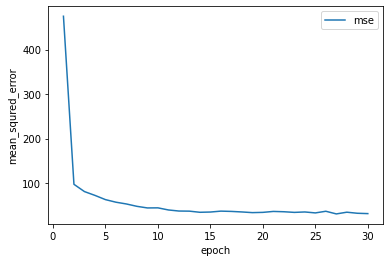

In [15]:
# MSE 학습 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squred_error')
plt.legend()
plt.show()

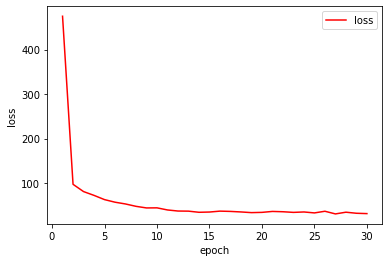

In [16]:
# 손실 학습 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# 실제값, 예측값 데이터 프레임 생성
pred_y = model.predict(X_te).flatten() 
print(pred_y)

[14.926869  17.68186   26.267515   7.9176764 15.005162  20.3347
 11.632012  22.128683  13.236665   7.8890853  5.1157737  9.617932
 10.792634   2.5619786 33.26321   22.726948  13.689977  29.558794
 24.675909  21.299334  22.893766  17.086306  16.023714  26.365974
 21.479944  10.689094  17.379759  11.004298  28.346983  15.011773
 10.714349  12.856965  17.735552  20.255516  24.823112  12.987599
  4.140405  16.951464   6.411712   6.4219527 22.591547  18.943981
 12.9456215  9.773435  17.00799   23.849699  16.26449   14.620786
  7.6369276 20.454521   7.7502074 11.073215  18.992071  22.401691
  7.765283  15.4073715 17.322489  10.068227  14.971868  18.075165
 16.162949  18.72122   24.999449  24.195608   9.034806  24.184462
 11.682706  13.9690275  8.437671  20.768162  15.780763  17.593163
 26.882385  23.865877  16.9549    -1.263068  27.122019  20.394732
 23.056808  16.387411  22.719769  17.167479  14.822953  28.526915
 28.235523  21.927996  20.2461     4.7907767 24.334192   9.029687
  9.726138  

In [18]:
import pandas as pd
res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real_val'] = y_te

In [19]:
res_df.head(3)

,predict_val,real_val
0,14.926869,22.6
1,17.681860,50.0
2,26.267515,23.0


In [20]:
df_sort = res_df.sort_values(["predict_val"], 
                             ascending=True)

In [24]:
df_sort.head(3)

,predict_val,real_val
116,-3.866311,8.4
96,-3.027407,13.8
75,-1.263068,7.4


In [25]:
len(df_sort)

127

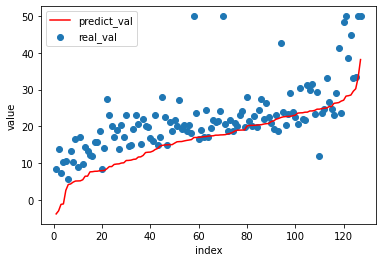

In [26]:
# 예측값 실제값 그래프
import matplotlib.pyplot as plt
import numpy as np
idx = np.arange(1,len(df_sort)+1)
plt.scatter(idx, df_sort['real_val'], 
            marker='o', 
            label='real_val')
plt.plot(idx, df_sort['predict_val'], 
         color='r', 
         label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

(506, 13)
{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8,

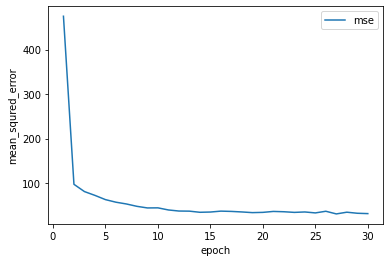

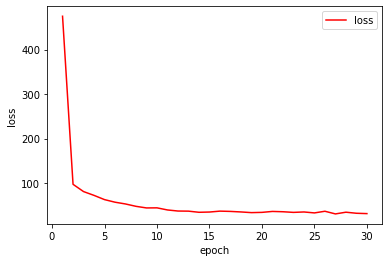

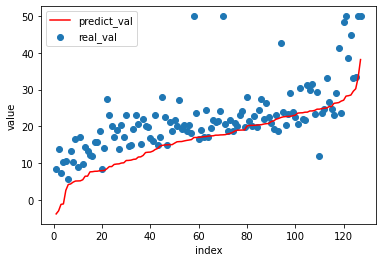

In [27]:
# 통합 코드

from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_boston = datasets.load_boston()

# 피쳐, 타겟 데이터 지정
X = raw_boston.data
y = raw_boston.target

# 피쳐 데이터 차원 확인
print(X.shape)

# 타겟 데이터 종류 확인
print(set(y))

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X, y, random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))

# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])

# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

epoch = np.arange(1,epo+1)
mse = hist.history['mean_squared_error'] 
loss = hist.history['loss'] 

# MSE 학습 그래프
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squred_error')
plt.legend()
plt.show()

# 손실 학습 그래프
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 실제값, 예측값 데이터 프레임 생성
pred_y = model.predict(X_te).flatten() 
res_df = pd.DataFrame(pred_y, columns=['predict_val'])
res_df['real_val'] = y_te
df_sort = res_df.sort_values(["predict_val"], 
                             ascending=True)

# 예측값 실제값 그래프
idx = np.arange(1,len(df_sort)+1)
plt.scatter(idx, df_sort['real_val'], 
            marker='o', 
            label='real_val')
plt.plot(idx, df_sort['predict_val'], 
         color='r',
         label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()